# Degree Distributions

<IPython.core.display.Javascript object>


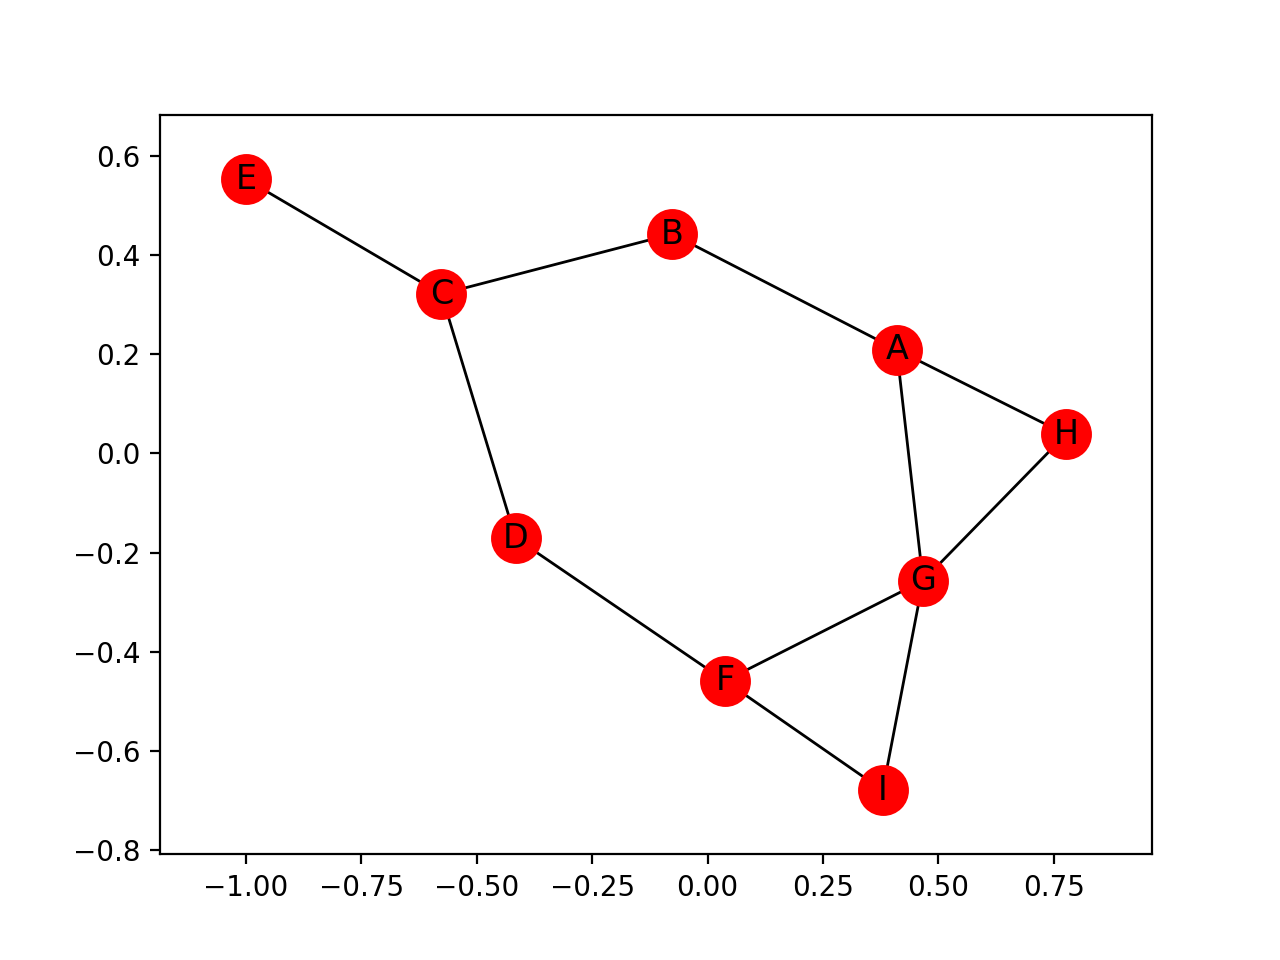

In [1]:
%matplotlib notebook
import networkx as nx
import matplotlib.pyplot as plt

g1 = nx.Graph()
g1.add_edges_from([
    ('A', 'B'), ('A', 'G'), ('A', 'H'),
    ('B', 'C'),
    ('C', 'D'), ('C', 'E'),
    ('D', 'F'),
    ('F', 'G'), ('F', 'I'),
    ('G', 'H'), ('G', 'I')
    ])
nx.draw_networkx(g1)

<IPython.core.display.Javascript object>


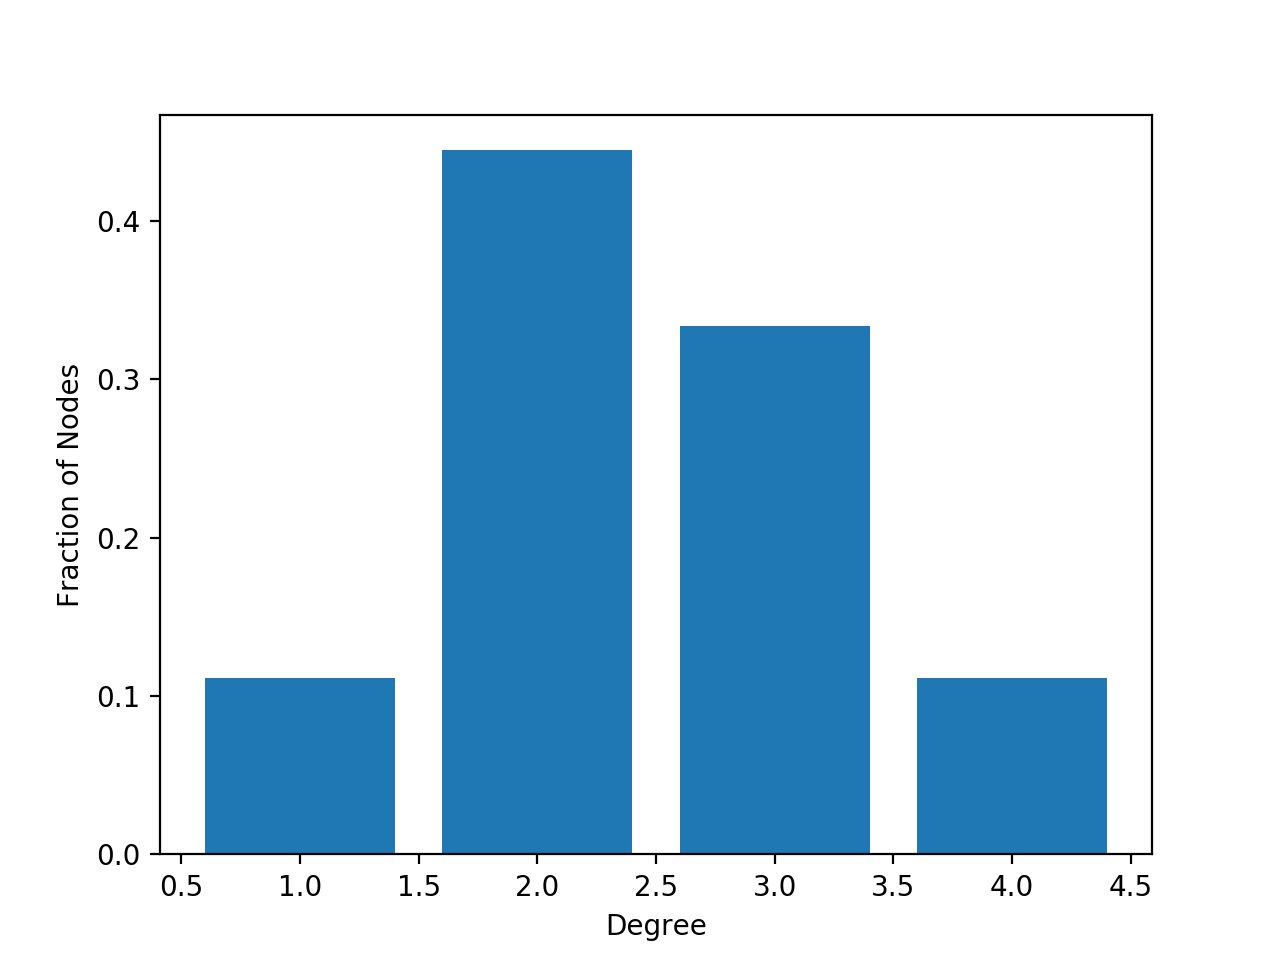

In [15]:
degrees = g1.degree()
degrees = dict(degrees)
degrees_set = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/ nx.number_of_nodes(g1) for i in degrees_set]

plt.bar(degrees_set, histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

<IPython.core.display.Javascript object>


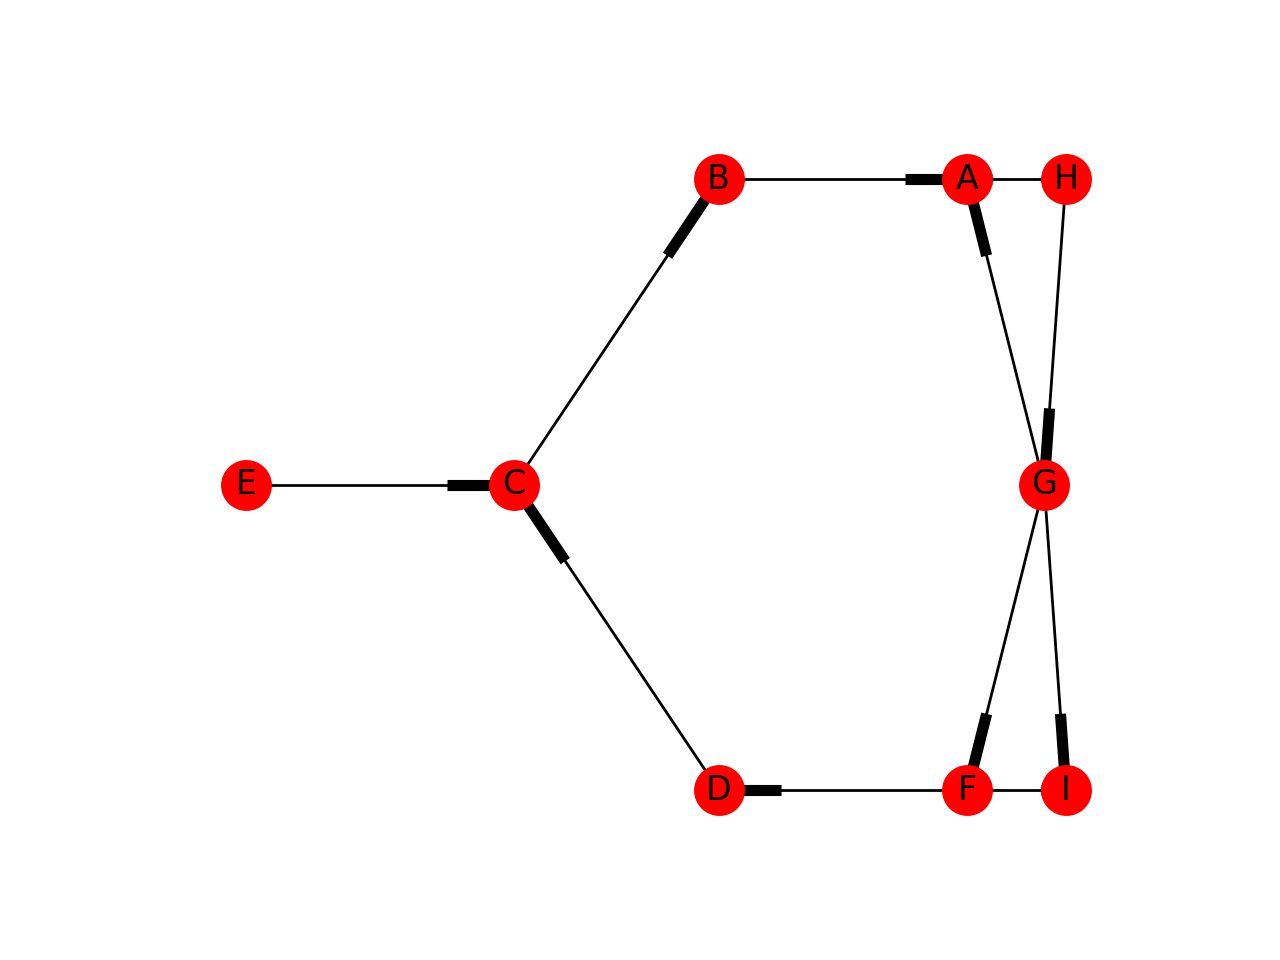

In [8]:
import io


f2 = io.BytesIO(
'''A
B A
C B
D C
E C
F D I
G A F I
H A G
I
'''.encode('utf-8'))

g2 = nx.read_adjlist(f2, nodetype=str, create_using=nx.DiGraph())
nx.draw_networkx(g2, pos=nx.spectral_layout(g2))

import matplotlib.pyplot as plt
limits=plt.axis('off')

# Indegree and Outdegree Distributions

<IPython.core.display.Javascript object>


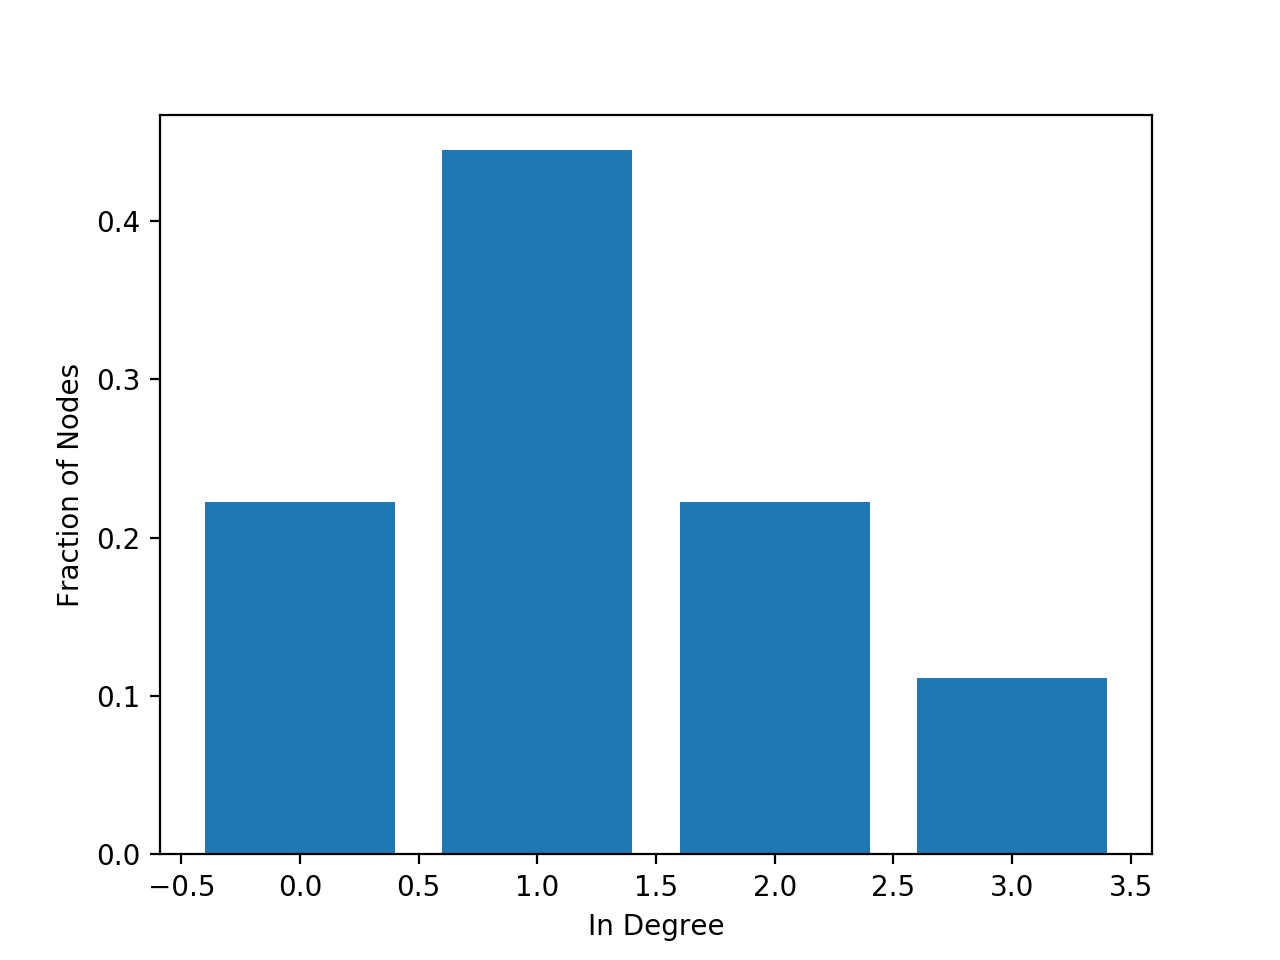

In [21]:
in_degrees = g2.in_degree()
in_degrees = dict(in_degrees)
in_degrees_set = sorted(set(in_degrees.values()))
histogram = [list(in_degrees.values()).count(i) / nx.number_of_nodes(g2) for i in in_degrees_set]

plt.bar(in_degrees_set, histogram)
plt.xlabel('In Degree')
plt.ylabel('Fraction of Nodes')

# Preferential Attachment Model

    Watch the video: difficult to explain.
    
    barabasi_albert_graph(n, m) returns a network with n nodes. Each new node attaches to m existing nodes according to the Perferential Attachement Model

In [22]:
g3 = nx.barabasi_albert_graph(1000_000, 1)

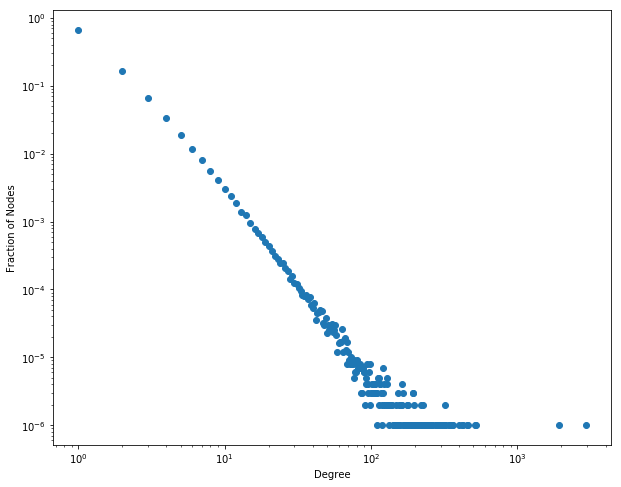

In [73]:
from collections import Counter

degrees = g3.degree()
degrees = dict(degrees)
degrees_set = sorted(set(degrees.values()))
distri = Counter(degrees[node] for node in degrees)
total_node_num = nx.number_of_nodes(g3)
histogram = [distri[i] / total_node_num  for i in degrees_set]

# for n, d in enumerate(degrees):
#     print(degrees[d])
#     if n >= 10:
#         break
# print(histogram[:10])
plt.figure(figsize=(10,8))
plt.plot(degrees_set, histogram, 'o')
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Path Length and Clustering

In [39]:
g4 = nx.barabasi_albert_graph(1000, 4)
print(nx.average_clustering(g4))
print(nx.average_shortest_path_length(g4))

# Answers given in the lecture are
# 0.0202859273671
# 4.16942942943

0.035869418716046805
3.1505485485485485


In [82]:
from collections import defaultdict


data = {}
for m in range(2, 11, 2):
    scores = defaultdict(list)
    for n in range(100, 2000, 100):
        g5 = nx.barabasi_albert_graph(n, m)
        scores['number'].append(n)
        scores['clustering'].append(nx.average_clustering(g5))
        scores['path_len'].append(nx.average_shortest_path_length(g5))
    data[m]=scores
    


In [84]:
#data[2]['number'], data[2]['clustering'], data[2]['path_len']
#len(results['avg_clustering'])

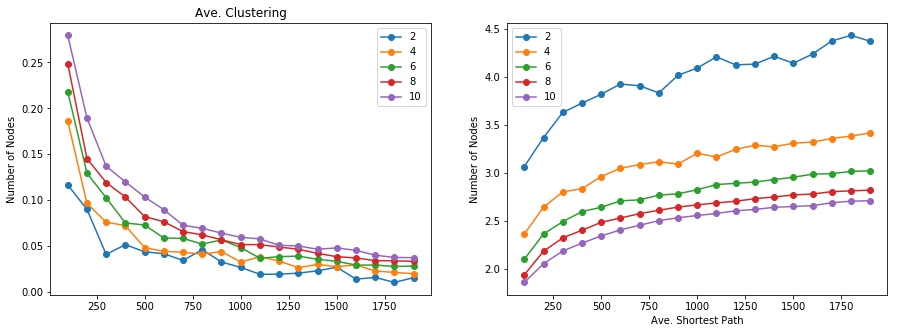

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
for m in range(2, 11, 2):
    plt.plot(data[m]['number'], data[m]['clustering'], '-o')
    plt.title('Ave. Clustering')
    plt.ylabel('Number of Nodes')
plt.legend(range(2, 11, 2))

plt.subplot(1, 2, 2)
for m in range(2, 11, 2):
    plt.plot(data[m]['number'], data[m]['path_len'], '-o')
    plt.xlabel('Ave. Shortest Path')
    plt.ylabel('Number of Nodes')
plt.legend(range(2, 11, 2))

plt.show()      


# Small World Model

watts_strogatz_graph(n, k, p) returns a small world network with n nodes, starting with a ring lattice with node connected to its k nearest neighbors, and rewiring probability p.

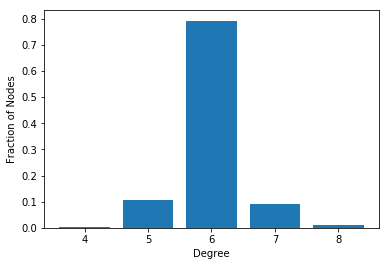

In [98]:
g5 = nx.watts_strogatz_graph(1000, 6, 0.04)
degrees = g5.degree()
degrees = dict(degrees)
degrees_set = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/ nx.number_of_nodes(g5) for i in degrees_set]

plt.bar(degrees_set, histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

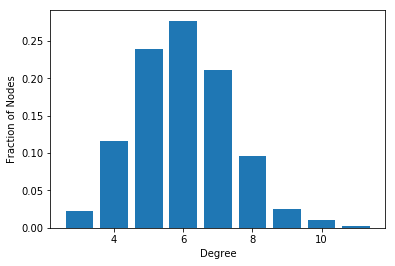

In [99]:
g5 = nx.watts_strogatz_graph(1000, 6, 0.4)
degrees = g5.degree()
degrees = dict(degrees)
degrees_set = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/ nx.number_of_nodes(g5) for i in degrees_set]

plt.bar(degrees_set, histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

# Link Prediction

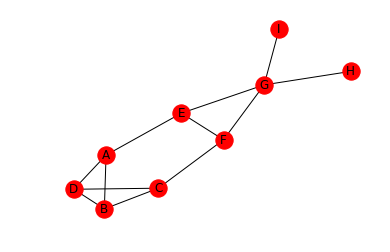

In [111]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

g6 = nx.Graph()
g6.add_edges_from([
    ('A', 'B'), ('A', 'D'), ('A', 'E'),
    ('B', 'C'), ('B', 'D'),
    ('C', 'D'), ('C', 'F'),
    ('E', 'F'), ('E', 'G'),
    ('F', 'G'),
    ('G', 'H'), ('G', 'I')
    ])
nx.draw_networkx(g6)
limits=plt.axis('off')

## Measure 1: Common Neighbors

In [123]:
common_neighbors = [(e[0], e[1], len(list(nx.common_neighbors(g6, e[0], e[1])))) 
                    for e in nx.non_edges(g6)]

# common_neighbors = [(min(e[0], e[1]), max(e[0], e[1]), len(list(nx.common_neighbors(g6, e[0], e[1])))) 
#                    for e in nx.non_edges(g6)]

In [124]:
from operator import itemgetter


common_neighbors = sorted(common_neighbors, key=itemgetter(2), reverse=True)
common_neighbors
# for A F, it is 1

[('C', 'A', 2),
 ('B', 'E', 1),
 ('B', 'F', 1),
 ('C', 'E', 1),
 ('C', 'G', 1),
 ('E', 'I', 1),
 ('E', 'D', 1),
 ('E', 'H', 1),
 ('F', 'I', 1),
 ('F', 'D', 1),
 ('F', 'A', 1),
 ('F', 'H', 1),
 ('A', 'G', 1),
 ('H', 'I', 1),
 ('B', 'H', 0),
 ('B', 'I', 0),
 ('B', 'G', 0),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('A', 'I', 0),
 ('A', 'H', 0),
 ('H', 'D', 0),
 ('I', 'D', 0),
 ('D', 'G', 0)]

## Measure 2: Jaccard Coefficient

Number of common neighbors normalized by the total number of neighbors

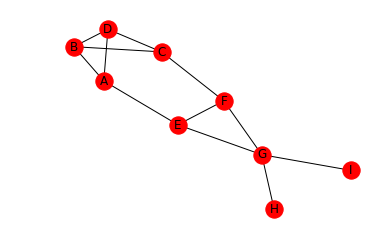

In [125]:
nx.draw_networkx(g6)
limits=plt.axis('off')

What is the Jaccard Coefficient between node A and F?

    A's neighbors = B, D, E
    F's neighbors = C, E, G
    A and F's common neighbors = E
    A and F's total neighbors = B, C, D, E, G
    Jaccard Coefficient = 1 / 5

In [129]:
from operator import itemgetter
sorted(list(nx.jaccard_coefficient(g6)), key=itemgetter(2), reverse=True)
# for A F, it is 0.2 

[('H', 'I', 1.0),
 ('C', 'A', 0.5),
 ('E', 'I', 0.3333333333333333),
 ('E', 'H', 0.3333333333333333),
 ('F', 'I', 0.3333333333333333),
 ('F', 'H', 0.3333333333333333),
 ('B', 'E', 0.2),
 ('B', 'F', 0.2),
 ('C', 'E', 0.2),
 ('E', 'D', 0.2),
 ('F', 'D', 0.2),
 ('F', 'A', 0.2),
 ('C', 'G', 0.16666666666666666),
 ('A', 'G', 0.16666666666666666),
 ('B', 'H', 0.0),
 ('B', 'I', 0.0),
 ('B', 'G', 0.0),
 ('C', 'H', 0.0),
 ('C', 'I', 0.0),
 ('A', 'I', 0.0),
 ('A', 'H', 0.0),
 ('H', 'D', 0.0),
 ('I', 'D', 0.0),
 ('D', 'G', 0.0)]

## Measure 3: Resource Allocation

    resource allocation for A, C = 1/3 + 1/3
    because they have two common neighbors B and D.
    By looking at B (degree 3, so 1/3) and D (degree 3, so 1/3)
    

In [131]:
from operator import itemgetter
sorted(list(nx.resource_allocation_index(g6)), key=itemgetter(2), reverse=True)
# For A F, it is 1/3

[('C', 'A', 0.6666666666666666),
 ('B', 'E', 0.3333333333333333),
 ('B', 'F', 0.3333333333333333),
 ('C', 'E', 0.3333333333333333),
 ('C', 'G', 0.3333333333333333),
 ('E', 'D', 0.3333333333333333),
 ('F', 'D', 0.3333333333333333),
 ('F', 'A', 0.3333333333333333),
 ('A', 'G', 0.3333333333333333),
 ('E', 'I', 0.25),
 ('E', 'H', 0.25),
 ('F', 'I', 0.25),
 ('F', 'H', 0.25),
 ('H', 'I', 0.25),
 ('B', 'H', 0),
 ('B', 'I', 0),
 ('B', 'G', 0),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('A', 'I', 0),
 ('A', 'H', 0),
 ('H', 'D', 0),
 ('I', 'D', 0),
 ('D', 'G', 0)]

## Measure 4: Adamic-Adar Index

Similar to resource allocation index but with log in the denominator.

In [132]:
from operator import itemgetter
sorted(list(nx.adamic_adar_index(g6)), key=itemgetter(2), reverse=True)
# For A F, it's 1/log3. By 1/3 => 1 / log(3)

[('C', 'A', 1.8204784532536746),
 ('B', 'E', 0.9102392266268373),
 ('B', 'F', 0.9102392266268373),
 ('C', 'E', 0.9102392266268373),
 ('C', 'G', 0.9102392266268373),
 ('E', 'D', 0.9102392266268373),
 ('F', 'D', 0.9102392266268373),
 ('F', 'A', 0.9102392266268373),
 ('A', 'G', 0.9102392266268373),
 ('E', 'I', 0.7213475204444817),
 ('E', 'H', 0.7213475204444817),
 ('F', 'I', 0.7213475204444817),
 ('F', 'H', 0.7213475204444817),
 ('H', 'I', 0.7213475204444817),
 ('B', 'H', 0),
 ('B', 'I', 0),
 ('B', 'G', 0),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('A', 'I', 0),
 ('A', 'H', 0),
 ('H', 'D', 0),
 ('I', 'D', 0),
 ('D', 'G', 0)]

## Measure 5: Preferential Attachment

    nodes with high degree get more neighbors.
    Product of the nodes' degree.

In [133]:
from operator import itemgetter
sorted(list(nx.preferential_attachment(g6)), key=itemgetter(2), reverse=True)
# For A F, it's 9. By 3 * 3

[('B', 'G', 12),
 ('C', 'G', 12),
 ('A', 'G', 12),
 ('D', 'G', 12),
 ('B', 'E', 9),
 ('B', 'F', 9),
 ('C', 'E', 9),
 ('C', 'A', 9),
 ('E', 'D', 9),
 ('F', 'D', 9),
 ('F', 'A', 9),
 ('B', 'H', 3),
 ('B', 'I', 3),
 ('C', 'H', 3),
 ('C', 'I', 3),
 ('E', 'I', 3),
 ('E', 'H', 3),
 ('F', 'I', 3),
 ('F', 'H', 3),
 ('A', 'I', 3),
 ('A', 'H', 3),
 ('H', 'D', 3),
 ('I', 'D', 3),
 ('H', 'I', 1)]

## Measure 6: Community Common Neighbors

    Number of common neighbors with bonus for neighbors in the same community
    soundarajan_hopcroft(A, C) = 2 + 2
        neighbors: B and D and both in the same community so each gets bonus (1) and becomes 2.
    soundarajan_hopcroft(A, G) = 1 + 0
        neighbors: E, not in the same community
        
    communities:
    1. A B C D
    2. E, F, G, H, I

In [147]:
g7 = g6.copy()
g7.add_node('J')
g7.remove_node('J')
g7.node, g6.node

(NodeView(('A', 'B', 'D', 'E', 'C', 'F', 'G', 'H', 'I')),
 NodeView(('A', 'B', 'D', 'E', 'C', 'F', 'G', 'H', 'I')))

In [149]:
# create communities
for n in ['A', 'B', 'C', 'D']:
    g7.node[n]['community'] = 0
for n in ['E', 'F', 'G', 'H', 'I']:
    g7.node[n]['community'] = 1

from operator import itemgetter
sorted(list(nx.cn_soundarajan_hopcroft(g7)), key=itemgetter(2), reverse=True)
# For A F, it's 1 (no bonus)

[('C', 'A', 4),
 ('E', 'I', 2),
 ('E', 'H', 2),
 ('F', 'I', 2),
 ('F', 'H', 2),
 ('H', 'I', 2),
 ('B', 'E', 1),
 ('B', 'F', 1),
 ('C', 'E', 1),
 ('C', 'G', 1),
 ('E', 'D', 1),
 ('F', 'D', 1),
 ('F', 'A', 1),
 ('A', 'G', 1),
 ('B', 'H', 0),
 ('B', 'I', 0),
 ('B', 'G', 0),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('A', 'I', 0),
 ('A', 'H', 0),
 ('H', 'D', 0),
 ('I', 'D', 0),
 ('D', 'G', 0)]

## Measure 7: Community Resource Allocation

    Similar to resource allocation index, but only consider nodes in the same community
    
    ra_soundarajan_hopcroft(A, C) = 1/3 + 1/3 = 2/3 as before
    ra_soundarajan_hopcroft(E, I) = 1/4 as before
    ra_soundarajan_hopcroft(A, G) = 0 (not counted 1/3 because not in the same community)
    
<img src="g6.png">

In [151]:
from operator import itemgetter
sorted(list(nx.ra_index_soundarajan_hopcroft(g7)), key=itemgetter(2), reverse=True)
# For A F, it's 0 instead of 1/3 because it's not in the same community.

[('C', 'A', 0.6666666666666666),
 ('E', 'I', 0.25),
 ('E', 'H', 0.25),
 ('F', 'I', 0.25),
 ('F', 'H', 0.25),
 ('H', 'I', 0.25),
 ('B', 'E', 0),
 ('B', 'H', 0),
 ('B', 'I', 0),
 ('B', 'F', 0),
 ('B', 'G', 0),
 ('C', 'E', 0),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('C', 'G', 0),
 ('E', 'D', 0),
 ('F', 'D', 0),
 ('F', 'A', 0),
 ('A', 'I', 0),
 ('A', 'G', 0),
 ('A', 'H', 0),
 ('H', 'D', 0),
 ('I', 'D', 0),
 ('D', 'G', 0)]

# Fix pickle file

In [2]:
GG = nx.Graph()
GG.add_nodes_from([('El Paso, TX', {'location': (-106, 31), 'population': 674433}),
 ('Long Beach, CA', {'location': (-118, 33), 'population': 469428}),
 ('Dallas, TX', {'location': (-96, 32), 'population': 1257676}),
 ('Oakland, CA', {'location': (-122, 37), 'population': 406253}),
 ('Albuquerque, NM', {'location': (-106, 35), 'population': 556495}),
 ('Baltimore, MD', {'location': (-76, 39), 'population': 622104}),
 ('Raleigh, NC', {'location': (-78, 35), 'population': 431746}),
 ('Mesa, AZ', {'location': (-111, 33), 'population': 457587}),
 ('Arlington, TX', {'location': (-97, 32), 'population': 379577}),
 ('Sacramento, CA', {'location': (-121, 38), 'population': 479686}),
 ('Wichita, KS', {'location': (-97, 37), 'population': 386552}),
 ('Tucson, AZ', {'location': (-110, 32), 'population': 526116}),
 ('Cleveland, OH', {'location': (-81, 41), 'population': 390113}),
 ('Louisville/Jefferson County, KY',
  {'location': (-85, 38), 'population': 609893}),
 ('San Jose, CA', {'location': (-121, 37), 'population': 998537}),
 ('Oklahoma City, OK', {'location': (-97, 35), 'population': 610613}),
 ('Atlanta, GA', {'location': (-84, 33), 'population': 447841}),
 ('New Orleans, LA', {'location': (-90, 29), 'population': 378715}),
 ('Miami, FL', {'location': (-80, 25), 'population': 417650}),
 ('Fresno, CA', {'location': (-119, 36), 'population': 509924}),
 ('Philadelphia, PA', {'location': (-75, 39), 'population': 1553165}),
 ('Houston, TX', {'location': (-95, 29), 'population': 2195914}),
 ('Boston, MA', {'location': (-71, 42), 'population': 645966}),
 ('Kansas City, MO', {'location': (-94, 39), 'population': 467007}),
 ('San Diego, CA', {'location': (-117, 32), 'population': 1355896}),
 ('Chicago, IL', {'location': (-87, 41), 'population': 2718782}),
 ('Charlotte, NC', {'location': (-80, 35), 'population': 792862}),
 ('Washington D.C.', {'location': (-77, 38), 'population': 646449}),
 ('San Antonio, TX', {'location': (-98, 29), 'population': 1409019}),
 ('Phoenix, AZ', {'location': (-112, 33), 'population': 1513367}),
 ('San Francisco, CA', {'location': (-122, 37), 'population': 837442}),
 ('Memphis, TN', {'location': (-90, 35), 'population': 653450}),
 ('Los Angeles, CA', {'location': (-118, 34), 'population': 3884307}),
 ('New York, NY', {'location': (-74, 40), 'population': 8405837}),
 ('Denver, CO', {'location': (-104, 39), 'population': 649495}),
 ('Omaha, NE', {'location': (-95, 41), 'population': 434353}),
 ('Seattle, WA', {'location': (-122, 47), 'population': 652405}),
 ('Portland, OR', {'location': (-122, 45), 'population': 609456}),
 ('Tulsa, OK', {'location': (-95, 36), 'population': 398121}),
 ('Austin, TX', {'location': (-97, 30), 'population': 885400}),
 ('Minneapolis, MN', {'location': (-93, 44), 'population': 400070}),
 ('Colorado Springs, CO', {'location': (-104, 38), 'population': 439886}),
 ('Fort Worth, TX', {'location': (-97, 32), 'population': 792727}),
 ('Indianapolis, IN', {'location': (-86, 39), 'population': 843393}),
 ('Las Vegas, NV', {'location': (-115, 36), 'population': 603488}),
 ('Detroit, MI', {'location': (-83, 42), 'population': 688701}),
 ('Nashville-Davidson, TN', {'location': (-86, 36), 'population': 634464}),
 ('Milwaukee, WI', {'location': (-87, 43), 'population': 599164}),
 ('Columbus, OH', {'location': (-82, 39), 'population': 822553}),
 ('Virginia Beach, VA', {'location': (-75, 36), 'population': 448479}),
 ('Jacksonville, FL', {'location': (-81, 30), 'population': 842583})])

In [3]:
nx.write_gpickle(GG, 'major_us_cities')